In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

#df1= pd.read_csv('..\ckd_dataset\kidney_disease_4.csv')
df = pd.read_csv('..\ckd_dataset\kidney_disease_2.csv') #NaN 값 있는 데이터로 통계를 내야함
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [2]:
df.drop('id', axis = 1, inplace = True) #id column 삭제
df.columns = ['Age', 'BP', 'SG', 'Albumin', 'urine_sugar', 'urine_RBC', 'urine_pc',
              'urine_pcc', 'urine_bacteria', 'blood_glucose', 'blood_urea', 'Creatinine', 'Sodium',
              'Potassium', 'Hemoglobin', 'Hematocrit', 'WBC_count', 'RBC_count',
              'HTN', 'DM', 'CAD', 'appetite', 'pedal_edema',
              'anemia', 'class']
df.head()

,Age,BP,SG,Albumin,urine_sugar,urine_RBC,urine_pc,urine_pcc,urine_bacteria,blood_glucose,blood_urea,Creatinine,Sodium,Potassium,Hemoglobin,Hematocrit,WBC_count,RBC_count,HTN,DM,CAD,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object'] #범주형
num_cols = [col for col in df.columns if df[col].dtype != 'object'] #숫자형

In [19]:
df[num_cols].isna().sum().sort_values(ascending = False)

RBC_count        131
WBC_count        106
Potassium         88
Sodium            87
Hematocrit        71
Hemoglobin        52
urine_sugar       49
SG                47
Albumin           46
blood_glucose     44
blood_urea        19
Creatinine        17
BP                12
dtype: int64

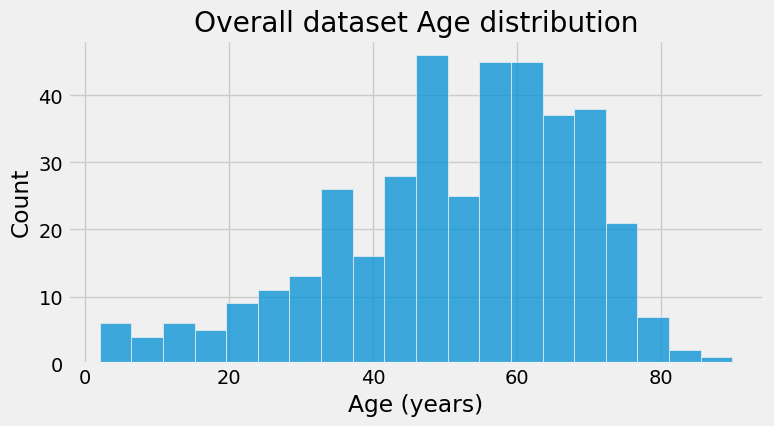

In [8]:
# (a) 히스토그램
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'].dropna(), bins=20, kde=False)
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('Overall dataset Age distribution')
plt.show()


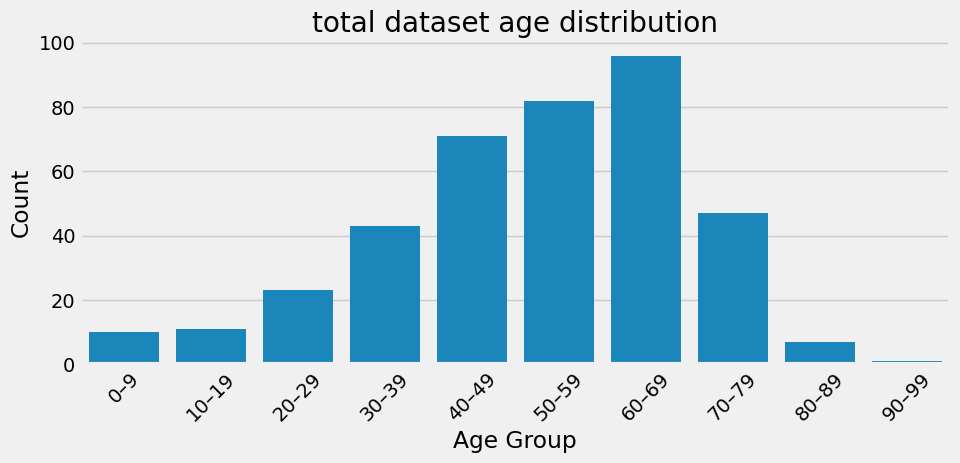

In [18]:
age_bins  = list(range(0, 101, 10))
age_labels = [f'{i}–{i+9}' for i in age_bins[:-1]]
df['Age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

age_counts = df['Age_group'].value_counts().sort_index()
plt.figure(figsize=(10, 4))
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('total dataset age distribution')
plt.show()


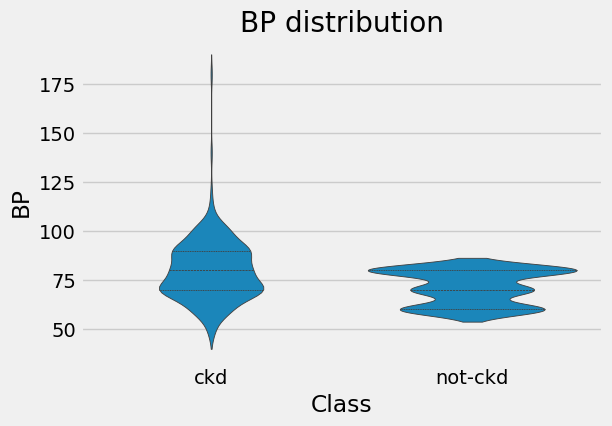

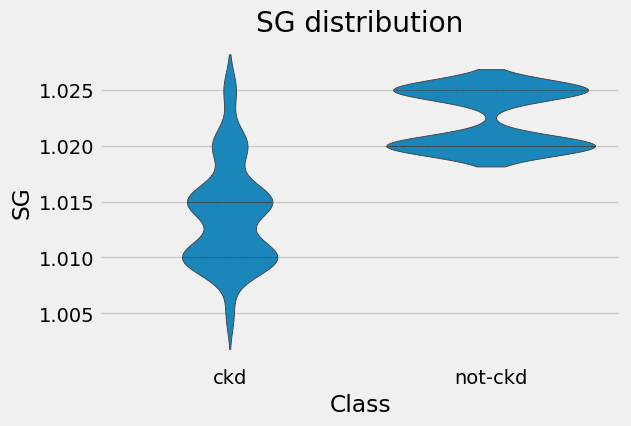

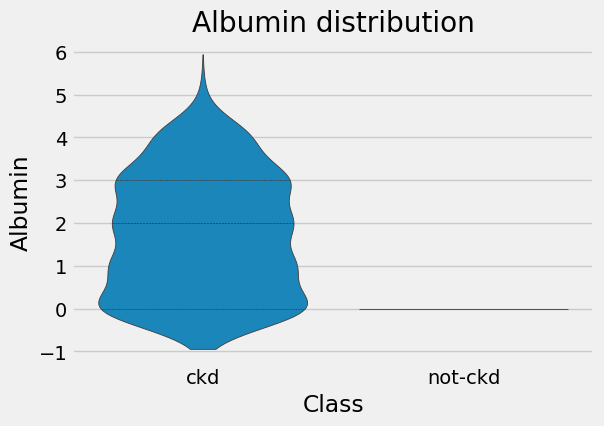

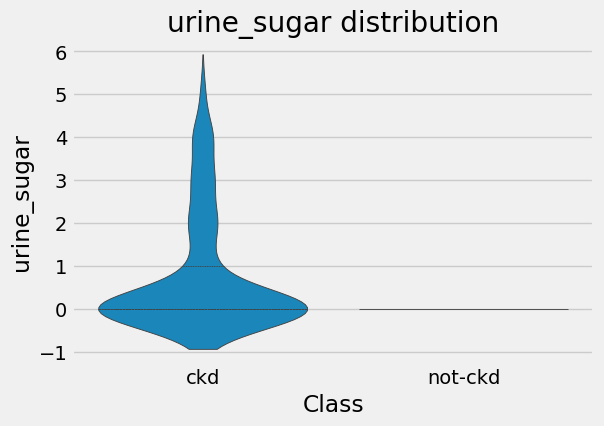

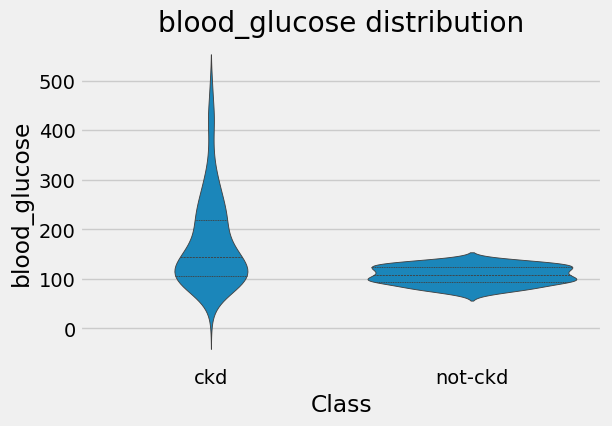

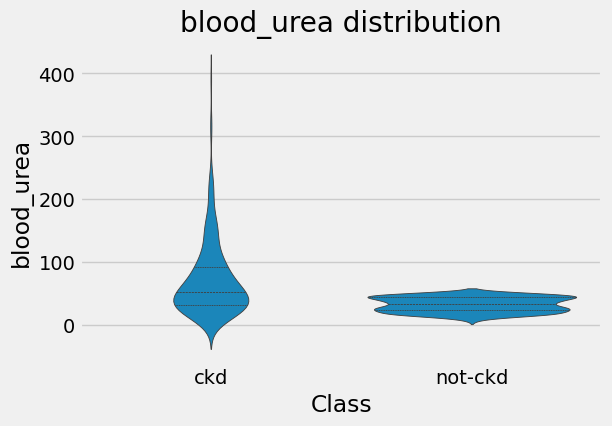

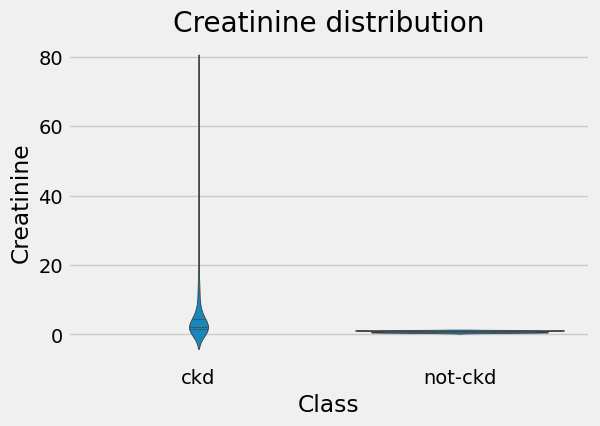

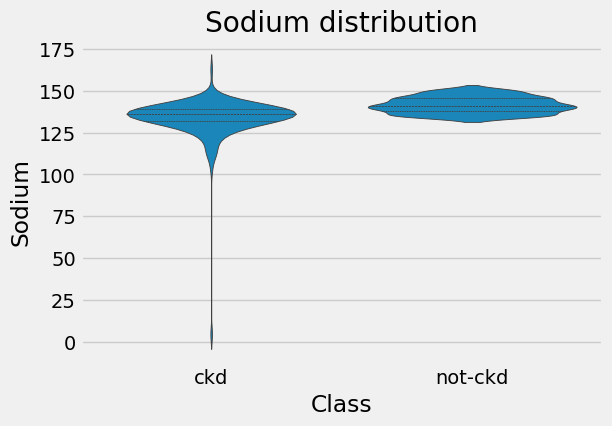

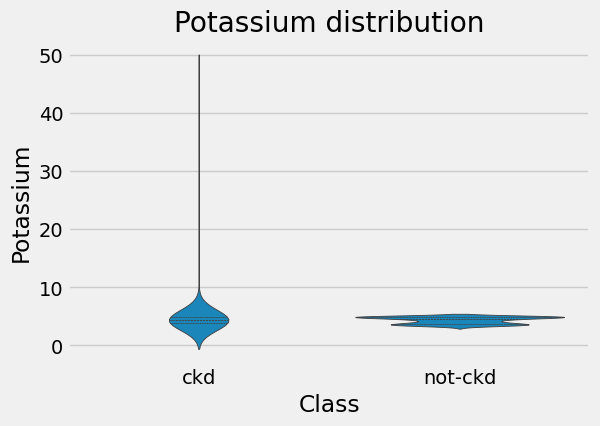

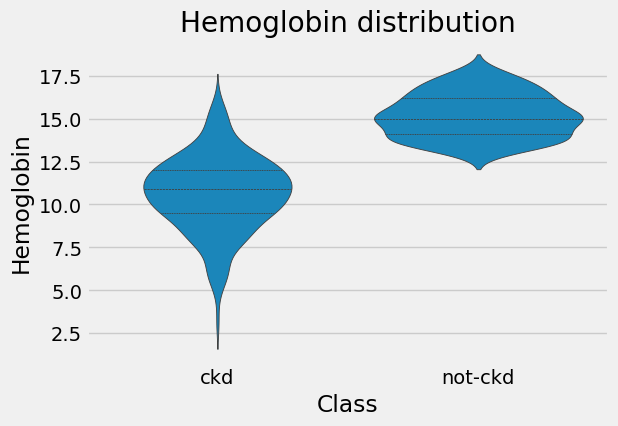

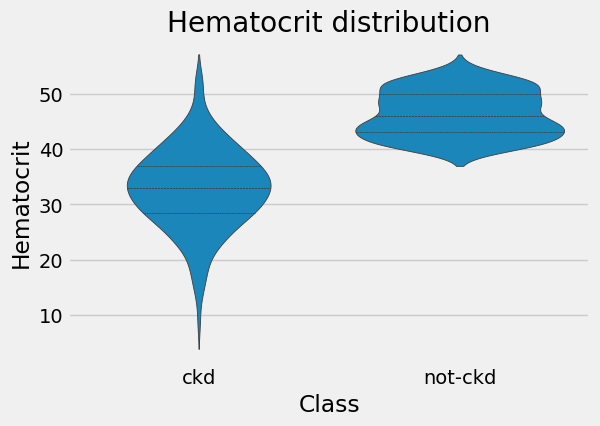

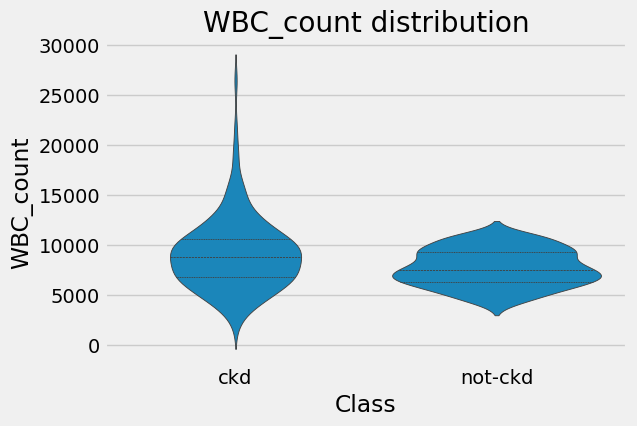

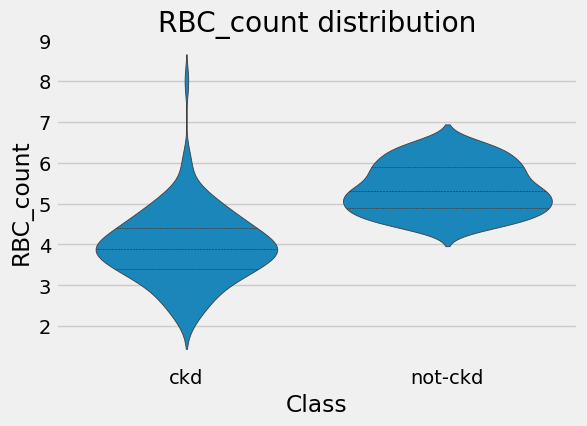

In [17]:
for col in num_cols:
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.violinplot(x='class_label', y=col, data=df, inner='quartile', ax=ax)
    ax.set_xlabel('Class')
    ax.set_ylabel(col)
    ax.set_title(f'{col} distribution')

    # PNG 저장
    fig.savefig(f'violin_{col}.png', dpi=300, bbox_inches='tight')
    # PDF 저장
    #fig.savefig(f'violin_{col}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

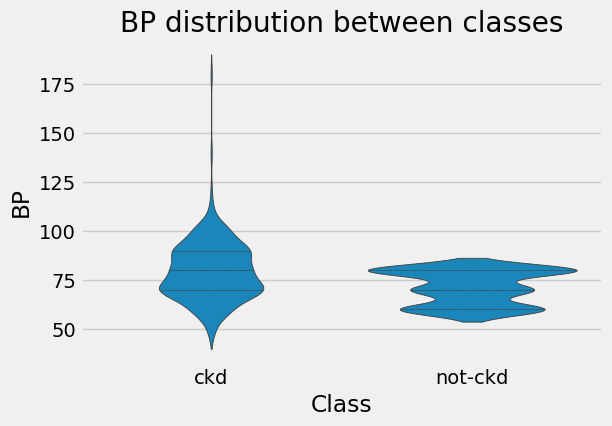

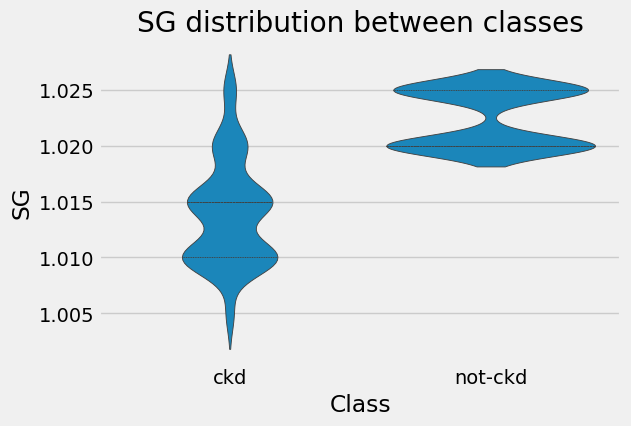

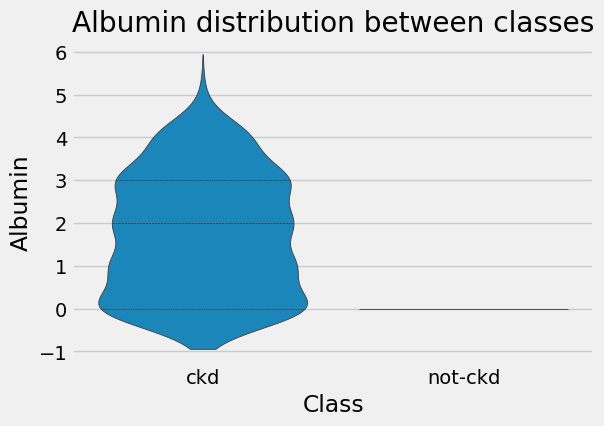

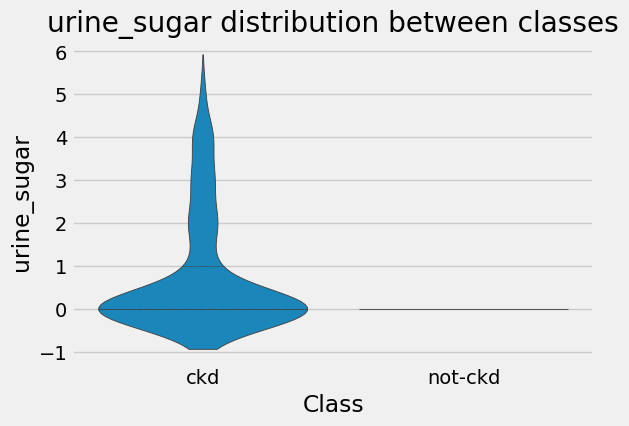

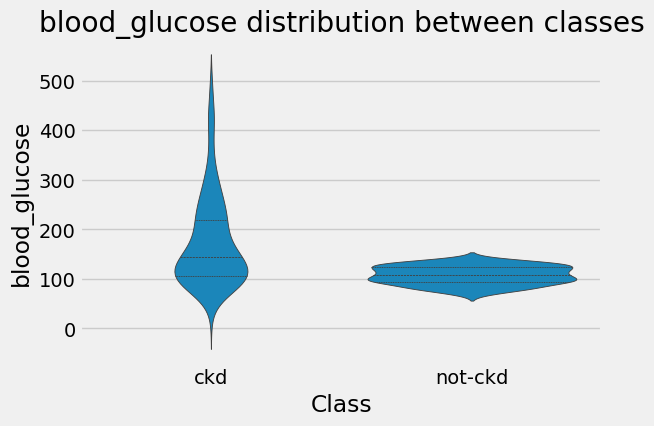

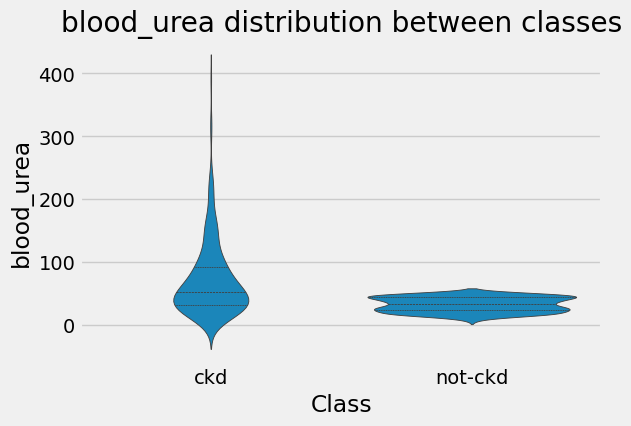

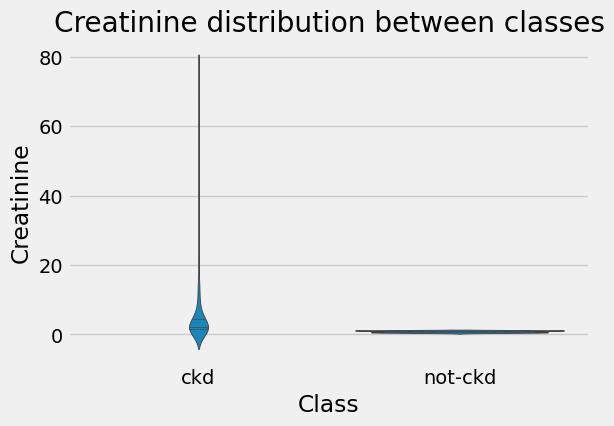

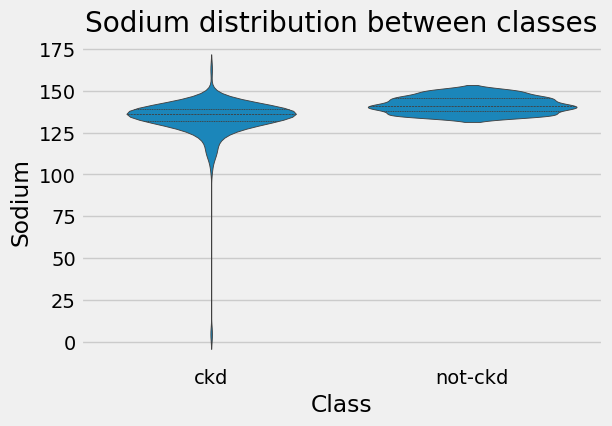

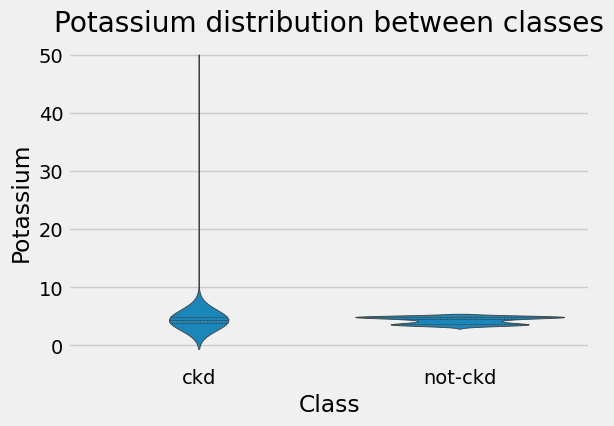

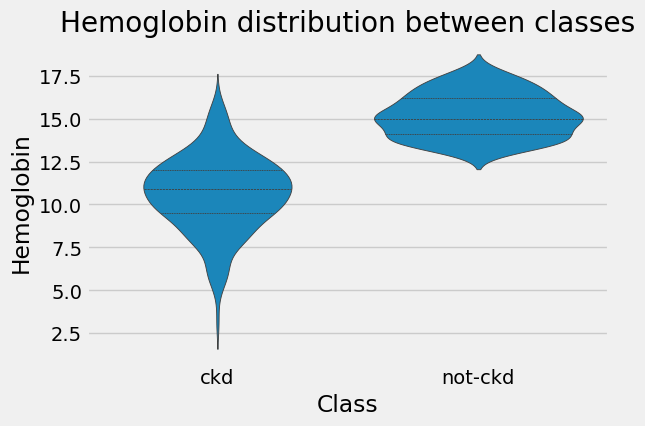

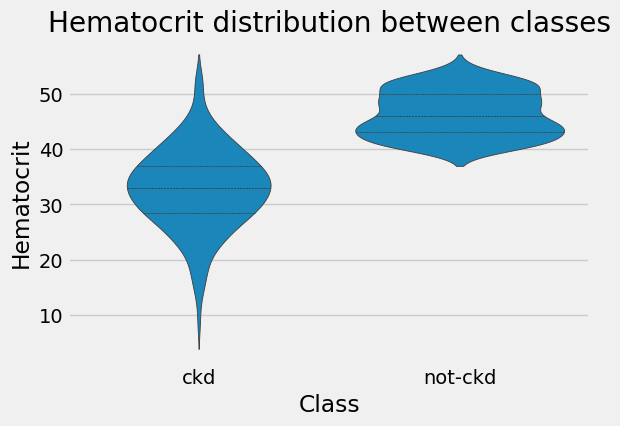

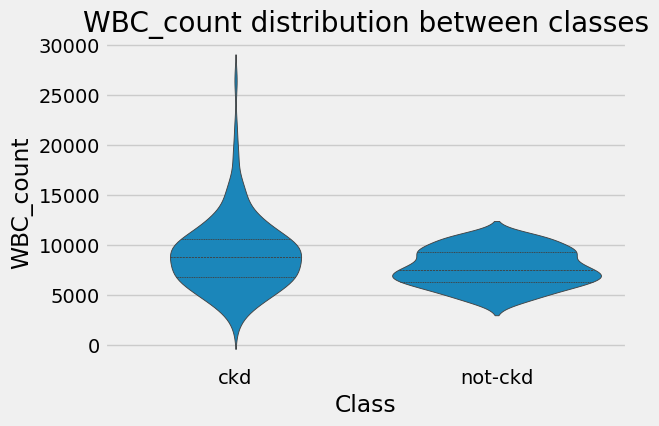

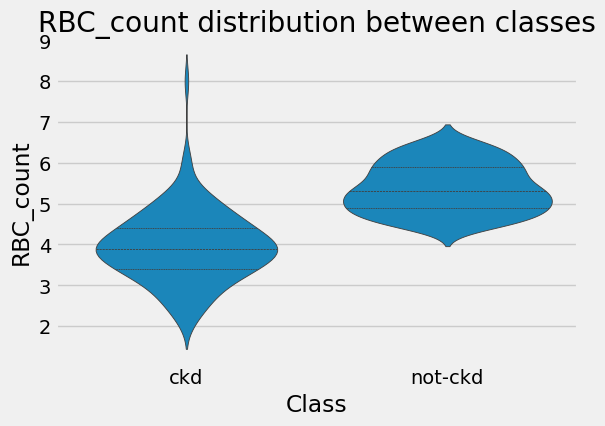

In [14]:
df['class_label'] = df['class'].replace({'notckd': 'not‑ckd', 'ckd': 'ckd'})

# numeric 컬럼 추출 (Age는 이미 처리했으므로 제외)
#num_cols = df.select_dtypes(include='number').columns.tolist()
#num_cols.remove('Age')

# 변수별로 반복해서 그리기
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='class_label', y=col, data=df, inner='quartile')
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.title(f'{col} distribution between classes')
    plt.show()

In [23]:
import os
import matplotlib.pyplot as plt

# 1) 저장 폴더 생성
os.makedirs('plots', exist_ok=True)

for col in cat_cols:
    counts = df[col].fillna('Missing').value_counts()
    labels = counts.index.tolist()
    sizes  = counts.values

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    ax.set_title(f'{col} (Pie Chart)')
    ax.axis('equal')

    # PNG로 저장 (dpi=300, 여백 최소화)
    filename = f'plots/pie_{col}.png'
    fig.savefig(
        filename,
        format='png',
        dpi=300,
        bbox_inches='tight',
        transparent=False
    )
    plt.close(fig)  # 메모리 절약을 위해 figure 닫기

    print(f'Saved: {filename}')


Saved: plots/pie_urine_RBC.png
Saved: plots/pie_urine_pc.png
Saved: plots/pie_urine_pcc.png
Saved: plots/pie_urine_bacteria.png
Saved: plots/pie_HTN.png
Saved: plots/pie_DM.png
Saved: plots/pie_CAD.png
Saved: plots/pie_appetite.png
Saved: plots/pie_pedal_edema.png
Saved: plots/pie_anemia.png
Saved: plots/pie_class.png


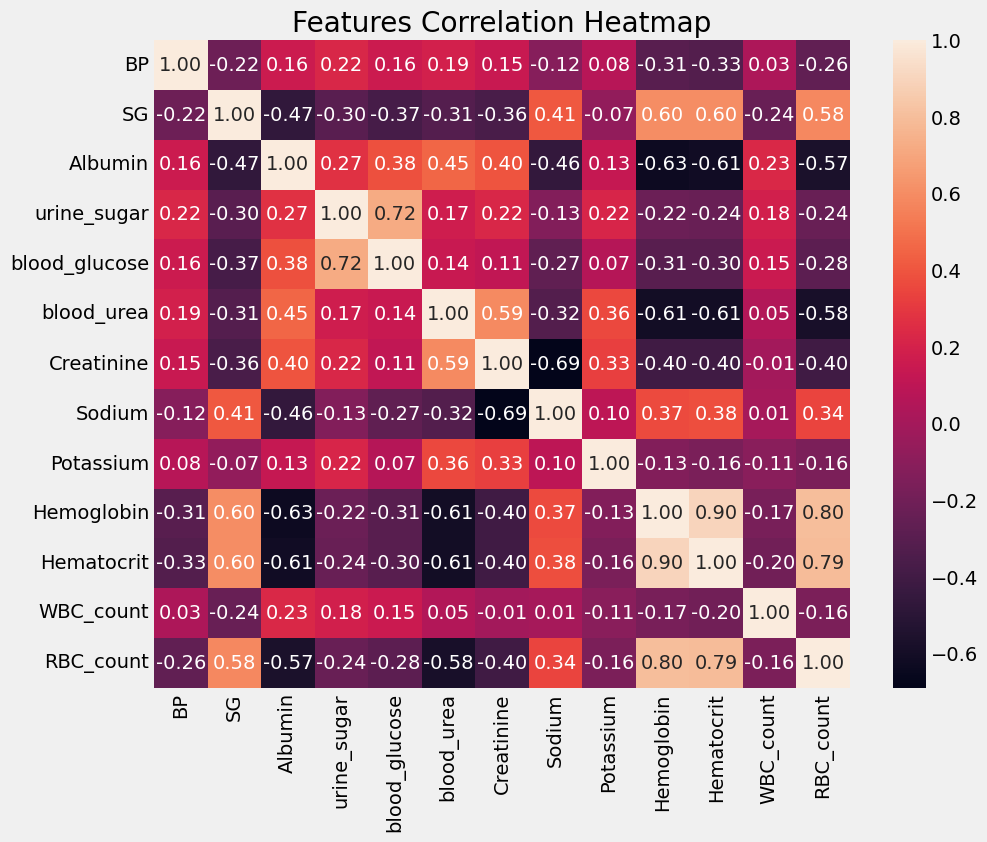

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))

# heatmap 그리기
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax)

# 제목(optional)
ax.set_title('Features Correlation Heatmap')

# PNG로 저장
fig.savefig(
    'plots/heatmap_correlation.png',  # 저장할 파일 경로/이름
    format='png',
    dpi=300,
    bbox_inches='tight',   # 여백 최소화
    transparent=False
)